In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air= pd.read_csv('./airline_passengers.csv')
air.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
air= pd.read_csv('./airline_passengers.csv',
                parse_dates=['Month'])
air.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


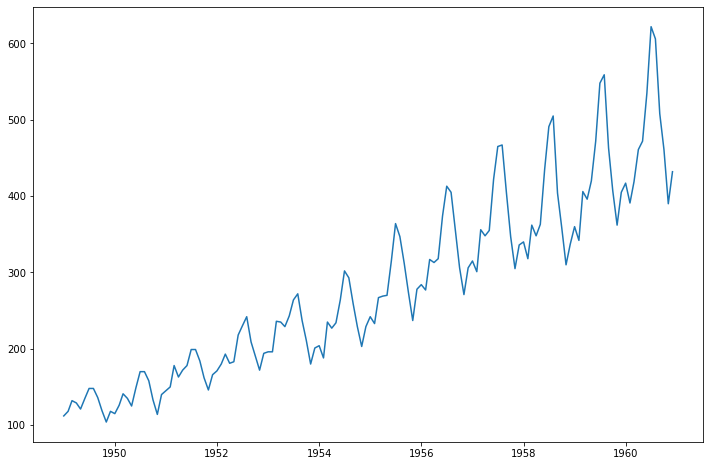

In [8]:
plt.figure(figsize=(12,8))
plt.plot(air['Month'],air['Thousands of Passengers'])

The graph contains trend component and seasonal component

In [12]:
air.rename({'Thousands of Passengers':"Count"}, inplace =True, axis = 1)

In [13]:
air.head()

,Month,Count
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
air.set_index("Month", inplace = True)

In [15]:
air.head()

,Count
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
air.isnull().sum()

Count    0
dtype: int64

# Check for stationarity

In [17]:
# Using adfuller test to check stationarity
from statsmodels.tsa.stattools import adfuller

In [18]:
results = adfuller(air)

In [21]:
print("Test Statistics : ", results[0])
print("P Value : ", results[1])
print("Critical Values : \n", results[4])

p_value = results[1]
if p_value <0.05:
    print("Series is stationary")
else:
    print("Series is not stationary")

Test Statistics :  0.8153688792060497
P Value :  0.991880243437641
Critical Values : 
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Series is not stationary


Since the series is not stationary perform differencing on the data to make it stationary

We can use 2 of the either technqiues like air.diff () or shift technique for differencing 

#### 1st order Differencing 

In [22]:
air_diff = air.diff()

In [23]:
air_diff

,Count
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [24]:
result= adfuller(air_diff.dropna())

In [25]:
print('Test Statistics :', result[0])
print('P Value :', result[1])
print("Critical Values: \n", result[4])

p_value = result[1]
if p_value< 0.05:
    print("The series is Stationsary")
else:
    print("The series is not Stationsary")

Test Statistics : -2.8292668241699963
P Value : 0.05421329028382592
Critical Values: 
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The series is not Stationsary


#### 2nd order differencing

In [27]:
air_diff2 = air_diff.diff()

In [28]:
result= adfuller(air_diff.diff().dropna())

In [30]:
print('Test Statistics :', result[0])
print('P Value :', result[1])
print("Critical Values: \n", result[4])

p_value = result[1]
if p_value< 0.05:
    print("The series is Stationary")
else:
    print("The series is not Stationary")

Test Statistics : -16.38423154246852
P Value : 2.732891850014085e-29
Critical Values: 
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The series is Stationary


---

In [31]:
# Since the data has monthly seasonality we would do the differecing with lag = 12

air_diff12 = air.diff(12)

In [32]:
air_diff12.head(20)

,Count
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [35]:
result= adfuller(air_diff12.dropna())

In [36]:
print('Test Statistics :', result[0])
print('P Value :', result[1])
print("Critical Values: \n", result[4])

p_value = result[1]
if p_value< 0.05:
    print("The series is Stationary")
else:
    print("The series is not Stationary")

Test Statistics : -3.3830207264924796
P Value : 0.011551493085515008
Critical Values: 
 {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The series is Stationary


# We will now identify the 3 components of ARIMA which are :

p - 

d - 1 (We have done only 1 time differencing so thats's why we are taking d=1 as the data was seasonal)

q -

for identifying p and q component we need 2 graphs

P- can be identifed using PACF plot

Q- Can be identified using ACF plot

In [37]:
# Let us plot the ACF graph

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

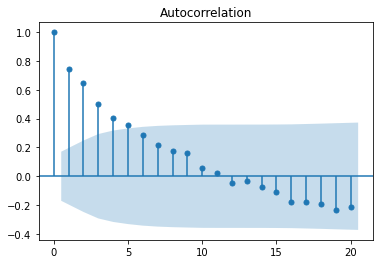

In [38]:
acf= plot_acf(air_diff12.dropna(), lags=20) # ACF plot gives you the q value

# Highlighted area: Insignificant area
for this problem we are talking q = 5 after 5 we are getting the value , or the values are going into the insgnificant area

We are chose q =5, sice after 5 lags the data of the series becomes insignificant 

Note: The first point in graph should not be taken in count while calculating p value

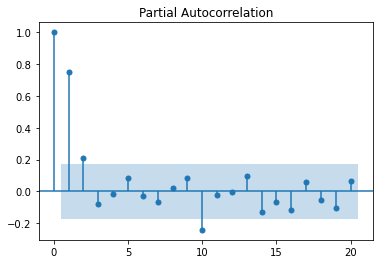

In [39]:
pacf= plot_pacf(air_diff12.dropna(), lags=20) # ACF plot gives you the p value

for this problem p = 2 and 10 can be taken since after 2 lags the data becomes insignificant

In [40]:
# the order for my model is(p,d,q) = (2,1,5)

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
air

,Count
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [43]:
# Let us split the data into train and test
len(air)

144

In [44]:
# Suppose we would be using 120 months data for training and 24 months data for testing
# for training and testing the data in time series we cant use sklearn model or library ,
# we need to use iloc here

train =air.iloc[:120]
test=air.iloc[120:]

In [45]:
len(train)

120

In [46]:
len(test)

24

### building the ARIMA model

In [47]:
model = ARIMA(train,order=(2,1,5))

C:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

In [48]:
arima = model.fit()

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
test

,Count
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [51]:
test.index[0]

Timestamp('1959-01-01 00:00:00')

In [52]:
test.index[-1]

Timestamp('1960-12-01 00:00:00')

In [53]:
start = test.index[0]
end= test.index[-1]

In [54]:
test['Prediction'] = arima.predict(start=start,end=end)

In [55]:
test.head()

,Count,Prediction
Month,,
1959-01-01,360,75.126322
1959-02-01,342,33.559872
1959-03-01,406,10.877328
1959-04-01,396,-35.884024
1959-05-01,420,-39.430155


In [56]:
# to evaluate the model we would use a metric MAPE

from sklearn.metrics import mean_absolute_percentage_error

In [57]:
print(mean_absolute_percentage_error(test['Count'],test['Prediction']))

0.9888134615166018


<AxesSubplot:xlabel='Month'>

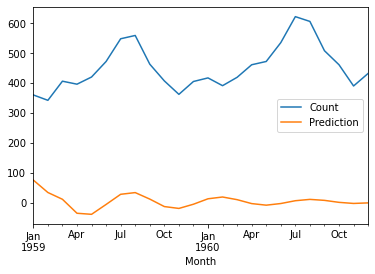

In [58]:
test[['Count','Prediction']].plot()

# Sarima Model

In [60]:
#Creating a SARIMAX model to deal with seasonality

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [61]:
model_SARIMA = SARIMAX (train,order=(2,1,5),seasonal_order=(0,1,0,12))

In [62]:
SARIMA = model_SARIMA.fit()

In [63]:
test['Prediction SARIMA'] = SARIMA.predict(start=start, end= end)

In [64]:
test.head()

,Count,Prediction,Prediction SARIMA
Month,,,
1959-01-01,360,75.126322,350.976095
1959-02-01,342,33.559872,322.554584
1959-03-01,406,10.877328,375.610916
1959-04-01,396,-35.884024,358.761780
1959-05-01,420,-39.430155,378.084468


<AxesSubplot:xlabel='Month'>

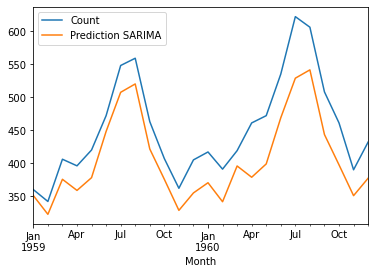

In [65]:
test[['Count','Prediction SARIMA']].plot()

# For future prediction:

In [66]:
val_pred = SARIMA.predict(start="1961-01-01", end="1961-12-01")

In [67]:
val_pred

1961-01-01    393.007434
1961-02-01    364.254241
1961-03-01    418.693867
1961-04-01    401.671023
1961-05-01    422.070389
1961-06-01    492.033566
1961-07-01    552.150594
1961-08-01    564.808307
1961-09-01    466.960819
1961-10-01    421.103894
1961-11-01    374.528611
1961-12-01    401.007487
Freq: MS, Name: predicted_mean, dtype: float64

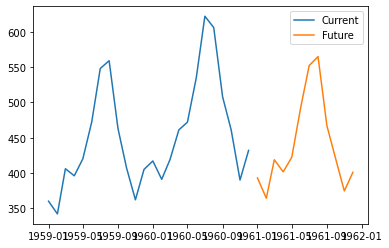

In [68]:
plt.plot(test['Count'])
plt.plot(val_pred)
plt.legend(['Current','Future'])